# TODO: Task 2 - Approximating linear vector fields

In [3]:
# All imports (TODO: Remove the ones that you don't use and add appropriate packages if necessary)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist
import utils
%reload_ext autoreload
%autoreload 2

# Load data
x0 = np.loadtxt('../../data/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('../../data/linear_vectorfield_data_x1.txt')

### TODO: Part 1 - Estimate the linear vector field that was used to generate the points $x_1$ from the points $x_0$

In [4]:
delta_T = 0.1

v = (x1-x0)/delta_T
#solve_ivp()
x1[0:1,:]

array([[-0.14754604,  0.40615976]])

In [5]:
x0[0:1,:]

array([[-0.16595599,  0.44064899]])

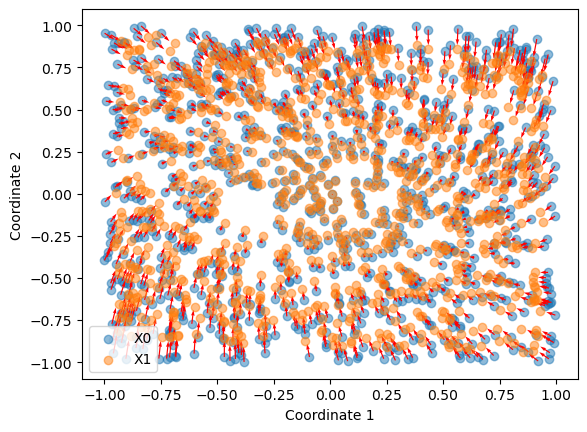

In [6]:
plt.scatter(x0[:,0],x0[:,1], label = 'X0', alpha= 0.5)
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')
plt.scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5)
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.legend()

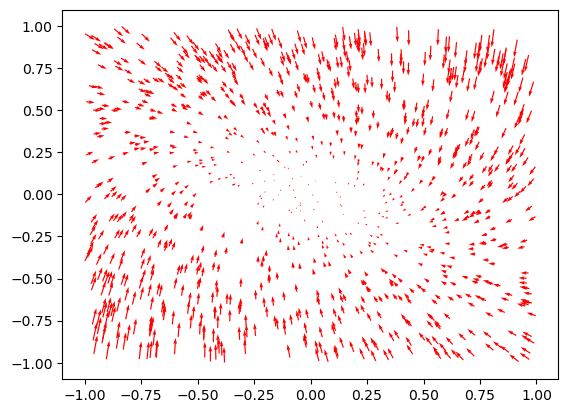

In [7]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')

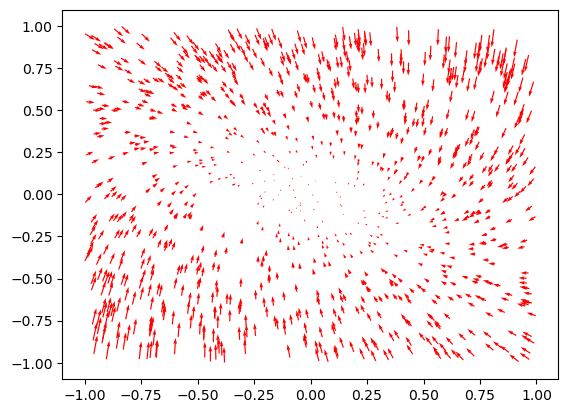

In [8]:
approx = utils.transform(x0, utils.least_squares(x0,v))
plt.quiver(x0[:,0], x0[:,1], approx[:,0], approx[:,1], color= 'r')

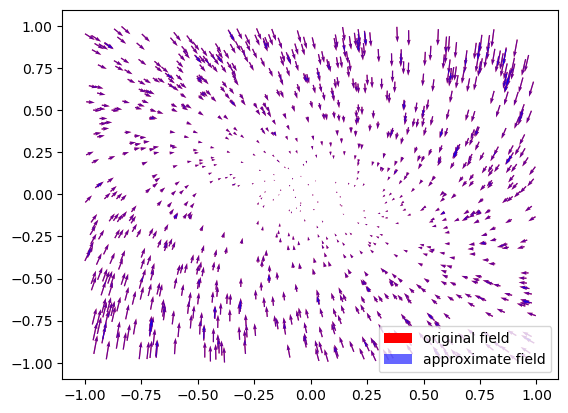

In [9]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
plt.quiver(x0[:,0], x0[:,1], approx[:,0], approx[:,1], color= 'b', alpha= 0.6, label ='approximate field')
plt.legend()

In [10]:
utils.least_squares(x0,v)

array([[-0.49355245, -0.4638232 ],
       [ 0.23191153, -0.95737573]])

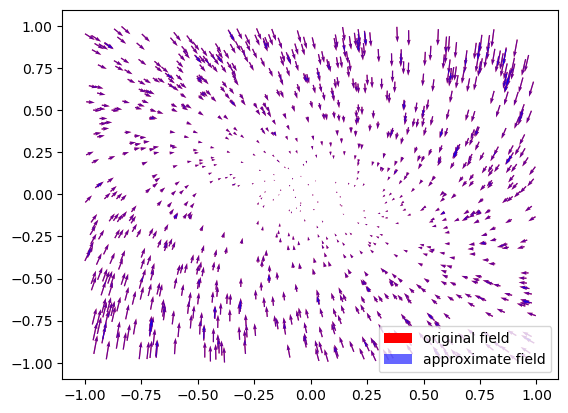

In [11]:
A_estim = utils.least_squares(x0,v)[0:2,0:2]
v_field_estim = x0@A_estim

plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
plt.quiver(x0[:,0], x0[:,1], v_field_estim[:,0], v_field_estim[:,1], color= 'b', alpha= 0.6, label ='approximate field')
plt.legend()

### TODO: Part 2 - Solve the linear system and compute the mean squared error

In [12]:
def f(t, y):
    return np.dot(y, A_estim)

In [13]:
approx_x1 = utils.x1_estim(f,x0, delta_T)

In [14]:
utils.mean_squared_error(x1, approx_x1)

9.957557291216314e-06

In [15]:
utils.error(x1, approx_x1)

AttributeError: module 'utils' has no attribute 'error'

In [ ]:
plt.scatter(approx_x1[:,0],approx_x1[:,1], label = 'X1 approximate', alpha= 0.5, marker='.')
plt.scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5, marker= '.')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.legend()

###  TODO: Part 3 - Visualize trajectories and phase portrait 

In [2]:
T_end = 100
t_eval = np.arange(0,100.1,delta_T)
solve = solve_ivp(f, [0,T_end], np.array([10,10]), t_eval= t_eval)
trajectory = solve.y.T
plt.plot(trajectory[:,0],trajectory[:,1])
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Predicted trajectory")

NameError: name 'np' is not defined

Text(0, 0.5, 'Coordinate 2')

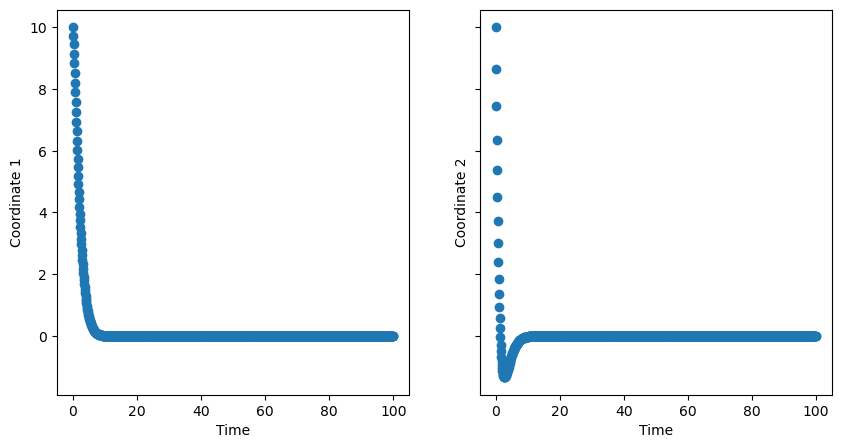

In [17]:
fig,ax = plt.subplots(1,2,figsize = (10,5), sharex=True, sharey=True)

ax[0].scatter(solve.t,trajectory[:,0])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Coordinate 1")
#ax[0].xlim(0,100)
#ax[0].ylim(-10,10)

ax[1].scatter(solve.t,trajectory[:,1])
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Coordinate 2")
#ax[1].xlim(0,100)
#ax[1].ylim(-10,10)

In [1]:
#coordinaates speed
speeds = [trajectory[i+1:i+2,:]-trajectory[i:i+1,:] for i in range(len(trajectory))]
speeds_stack = speeds[0]
for i in range(len(speeds)-1):
    speeds_stack = np.vstack((speeds_stack, speeds[i+1]))
fig,ax = plt.subplots(1,2,figsize = (10,5), sharex=True, sharey=True)

ax[0].plot(trajectory[:1000,0], speeds_stack[:,0])
ax[0].set_xlabel("Coordinate 1")
ax[0].set_ylabel("Speed")
#ax[0].xlim(0,100)
#ax[0].ylim(-10,10)

ax[1].plot(trajectory[:1000,1],speeds_stack[:,0])
ax[1].set_xlabel("Coordinate2")
ax[1].set_ylabel("Speed")
#ax[1].xlim(0,100)
#ax[1].ylim(-10,10)

NameError: name 'trajectory' is not defined

Text(0.5, 1.0, 'Phase portrait')

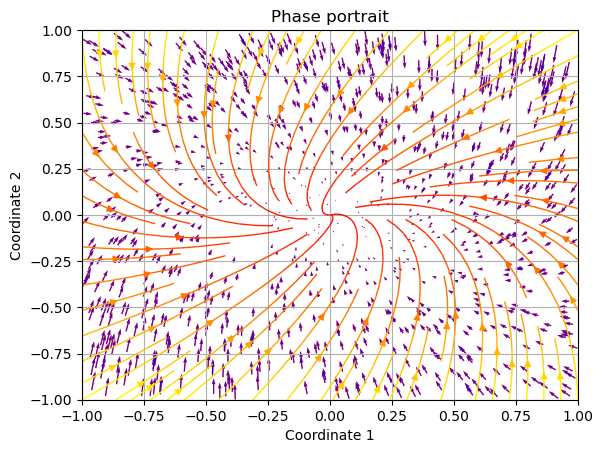

In [24]:
x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, y)
DX = A_estim[0,0]*X + A_estim[0,1]*Y
DY = A_estim[1,0]*X + A_estim[1,1]*Y

plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
plt.quiver(x0[:,0], x0[:,1], v_field_estim[:,0], v_field_estim[:,1], color= 'b', alpha= 0.6, label ='approximate field')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid()
plt.title("Phase portrait")

Text(0.5, 1.0, 'Phase portrait')

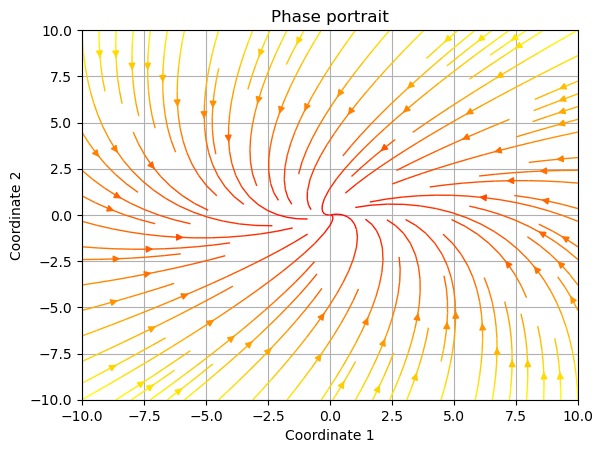

In [25]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
DX = A_estim[0,0]*X + A_estim[0,1]*Y
DY = A_estim[1,0]*X + A_estim[1,1]*Y

plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Phase portrait")

In [ ]:
plt.plot(trajectory[:,0],trajectory[:,1])
plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Predicted trajectory")

In [ ]:
trajectories_dict = {}
trajectories_list = []
for i in range(-10,11):
    for j in range(-10,11):

        trajectories_list.append(utils.trajectory(f, np.array([i,j]), T_end, t_eval= t_eval))
        trajectories_dict[(i,j)] = (utils.trajectory(f, np.array([i,j]), T_end, t_eval= t_eval))

In [ ]:
plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')
for i in range(len(trajectories_list)):
    plt.plot(trajectories_list[i][:,0],trajectories_list[i][:,1])
    plt.xlabel("Coordinate 1")
    plt.ylabel("Coordinate 2")
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.grid()
    plt.title("Predicted trajectory")

In [ ]:
plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')

plt.plot(trajectories_dict[(10,10)][:,0],trajectories_dict[(10,10)][:,1])
plt.plot(trajectories_dict[(-10,10)][:,0],trajectories_dict[(-10,10)][:,1])
plt.plot(trajectories_dict[(10,-10)][:,0],trajectories_dict[(10,-10)][:,1])
plt.plot(trajectories_dict[(-10,-10)][:,0],trajectories_dict[(-10,-10)][:,1])
plt.plot(trajectories_dict[(0,0)][:,0],trajectories_dict[(0,0)][:,1])
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Predicted trajectory")

In [ ]:
trajectories_dict[(0,0)]

In [26]:
X.shape

(1000, 1000)